In [10]:
from Initial_module_load import *
model_update('model_parameters_base_DSPL_mock1')

✅ Model parameters reloaded successfully from model_parameters_base_DSPL_mock1!
CURRENT MODEL PARAMETERS
Lens center: (0.030000, -0.140404)
Redshifts - Lens: 0.5, Source 1: 0.8, Source 2: 1.7
Einstein radius: 1.7124
❌ Error reloading parameters: 'gamma1'
✅ Model configurations built successfully!
📊 Model includes:
   - Lens models: 3 (SIE, SHEAR_GAMMA_PSI, SIE)
   - Source models: 2 (SERSIC_ELLIPSE, SERSIC_ELLIPSE)
   - Lens light models: 1 (SERSIC_ELLIPSE)
   - Multi-plane: True
   - Redshifts: z_l=0.5, z_s1=0.8, z_s2=1.7

🔍 Quick parameter check:
   - Einstein radius: 1.7124
   - Lens center: (0.030000, -0.140404)
   - Shear: gamma_ext=0.1192, psi_ext=0.5038

🔄 Run this cell/function anytime to reload parameters from your parameter module


In [11]:
kwargs_data_F200LP, kwargs_psf_F200LP = import_data_mock('../tutorials_DB_2025_09/mocks/images/mock_1_image.fits',
                                                    '../tutorials_DB_2025_09/mocks/PSF/mock_psf.fits')

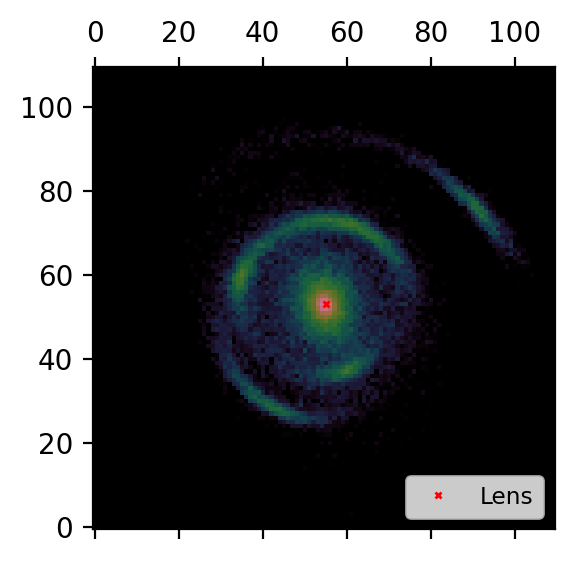

In [12]:
mock_observable_params_plot(kwargs_data_F200LP, kwargs_psf_F200LP)

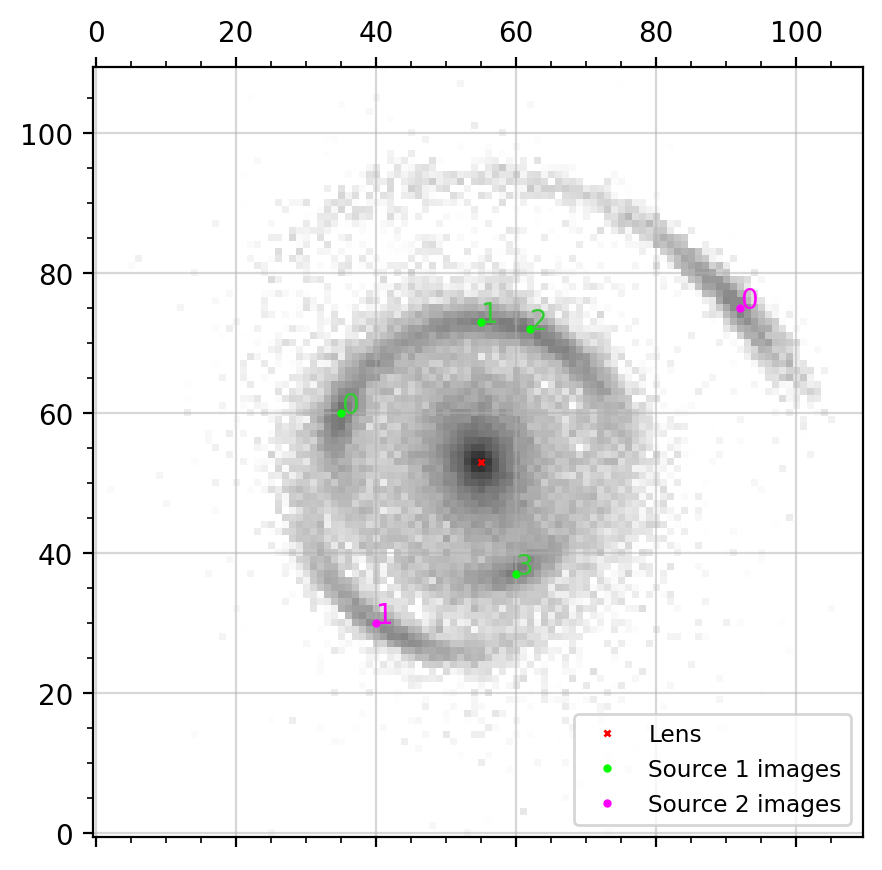

In [13]:
position_modeling_plot(kwargs_data_F200LP, kwargs_psf_F200LP,
                       source2 = True,
                       s1_x_F200LP = np.array([35,55,62,60]),
                       s1_y_F200LP = np.array([60,73,72,37]),
                       s2_x_F200LP = np.array([92,40]),
                       s2_y_F200LP = np.array([75,30]),
                       positions_found = True)



The number of source 1 images is: 4
The number of source 2 images is: 2

 the fitted model parameters are:  [{'theta_E': 0.9815586056054791, 'e1': -0.14668941306934952, 'e2': -0.06318501254976609, 'center_x': 0.029802319329065845, 'center_y': -0.1410938920728994}, {'gamma1': -0.00607343071004852, 'gamma2': 0.014802480853229955, 'ra_0': 0, 'dec_0': 0}]

 The relative x position in the source plane (should match) is:  [-0.02972155 -0.02873209 -0.03154803 -0.02878796]

 The relative y position in the source plane (should match) is:  [-0.00692653 -0.00748283 -0.00530354 -0.00651987]

 mean source pos -0.029697409146842556 -0.006558193160080383
There are 9 regions identified that could contain a solution of the lens equation withcoordinates [ 0.275 -0.975 -0.925 -0.525 -0.425  0.475 -0.275  0.375  0.025] and [-0.875  0.275  0.375  0.775  0.825  0.825  0.875  0.875  0.925] 
The number of regions that meet the plausibility criteria are 9
Solution found for region 0 with required precision at 

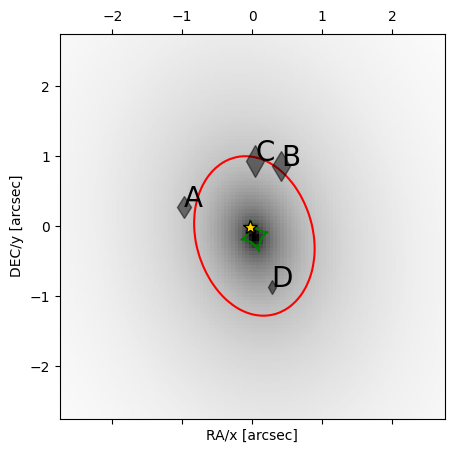


 the re-fitted macro-model parameters are:  [{'theta_E': 1.712813321224329, 'e1': -0.14668941306934952, 'e2': -0.06318501254976609, 'center_x': 0.029802319329065845, 'center_y': -0.1410938920728994}, {'gamma1': -0.015738556477684604, 'gamma2': 0.002880597160092157, 'ra_0': 0, 'dec_0': 0}, {'theta_E': 0.0, 'e1': 0.0, 'e2': 0.0, 'center_x': -0.029697409146842556, 'center_y': -0.006558193160080383}]
[0.34575862 0.39120211]
[0.15261242 0.09574258]

 The relative x position in the source plane (should match) is:  [0.34575862 0.39120211]

 The relative y position in the source plane (should match) is:  [0.15261242 0.09574258]

 new mean source pos 0.36848036403763684 0.1241775029195101

 predicted imag pos based on lens init para [ 1.93719131 -0.61069892] [ 0.92678766 -1.28416576]


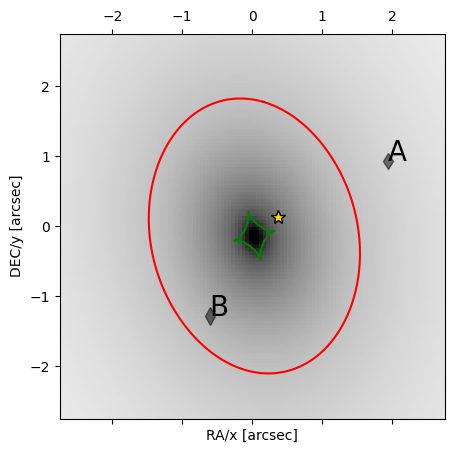

In [14]:
key_initial_guesses = position_modeling_calculation(plot_model_prediction = False, plot_convergence = True)

# You will use these initial guesses in the next, more in-depth modeling steps.
# Using the key_initial_guesses dictionary, you can set up the priors/initial parameters
# for the lens and source model parameters.
#
# Best to update the initial guesses directly in the model_parameters_base*.py file that is being used. 


In [15]:
key_initial_guesses

{'ra_image_s1_pred': array([-0.9742148 ,  0.41412769,  0.04237445,  0.27661205]),
 'dec_image_s1_pred': array([ 0.27715996,  0.86059833,  0.92612167, -0.87416456]),
 'ra_image_s2_pred': array([ 1.93719131, -0.61069892]),
 'dec_image_s2_pred': array([ 0.92678766, -1.28416576]),
 'center_x_pred': 0.029802319329065845,
 'center_y_pred': -0.1410938920728994,
 's1_x_pred': -0.029697409146842556,
 's1_y_pred': -0.006558193160080383,
 's2_x_pred': 0.36848036403763684,
 's2_y_pred': 0.1241775029195101,
 'theta_E_lens_pred': 1.712813321224329,
 'e1_lens_pred': -0.14668941306934952,
 'e2_lens_pred': -0.06318501254976609,
 'gamma1_ext_pred': -0.015738556477684604,
 'gamma2_ext_pred': 0.002880597160092157}

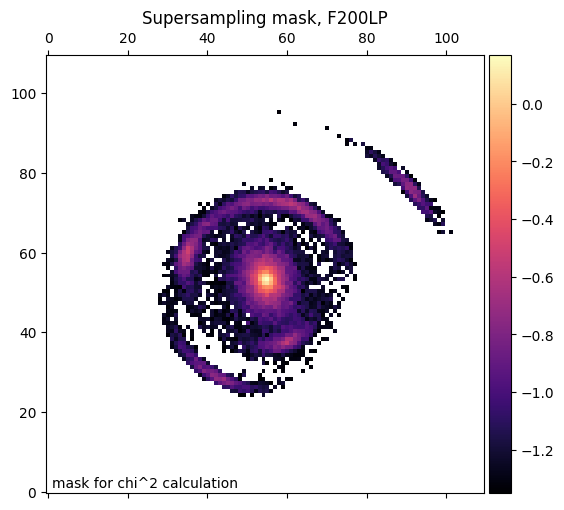

In [16]:
# Now, let's create a supersampling mask to speed up the modeling,
# by avoiding supersampling in regions of low flux.
# You can adjust the threshold parameter to change the mask.
# A threshold of 3.8 means that pixels with flux > max_flux/10^(3.8/2.5) will not be supersampled.

supersampling_masking(kwargs_data_F200LP, threshold=3.8, plot_mask = True)

In [17]:
# Cosmology calculations check

print('Angular diameter distance between s1 and s2: {} Mpc'.format(D_s1s2))
print('Deflection angle rescale factor: {:.6f}'.format(deflection_scaling))
print('Beta:{:.6f}'.format(beta))

Angular diameter distance between s1 and s2: 713.6636882255873 Mpc
Deflection angle rescale factor: 1.858580
Beta:0.538045


In [ ]:
job_name = 'PSO_double_source_test'

cluster_comp = False

sampling_inputs = setup_prior_to_sampling(kwargs_data_F200LP, kwargs_psf_F200LP)


fitting_kwargs_list = [#['update_settings', {'kwargs_likelihood': {'bands_compute': [True, True]}}],
                       #['PSO', {'sigma_scale': 10, 'n_particles': 220, 'n_iterations': 3000}],
                       
                       #['PSO', {'sigma_scale': 5, 'n_particles': 100, 'n_iterations': 300}],
                       ['PSO', {'sigma_scale': 5, 'n_particles': 100, 'n_iterations': 300}],

                       #['PSO', {'sigma_scale': 0.5, 'n_particles': 220, 'n_iterations': 2000}],
                       #['PSO', {'sigma_scale': 0.1, 'n_particles': 220, 'n_iterations': 2000}],
                       #['MCMC', {'n_burn': 100, 'n_run': 3000, 'walkerRatio': 6, 'sigma_scale': 0.5}]
                       ]

configure_model_and_run(job_name, sampling_inputs, cluster_compute=cluster_comp, 
                fitting_kwargs_list=fitting_kwargs_list, kwargs_params=kwargs_params)

Number of source models: 2
Computing the PSO ...


100%|██████████| 300/300 [01:08<00:00,  4.35it/s]

Max iteration reached! Stopping.
-1.171960485590075 reduced X^2 of best position
-7073.367510778898 log likelihood
12071 effective number of data points
[{'theta_E': 1.754575621291369, 'e1': -0.11469562832074841, 'e2': -0.04992555163753328, 'center_x': 0.006237301570056981, 'center_y': -0.09040426854490732}, {'gamma_ext': 6.385424396613182e-07, 'psi_ext': 0.0028713642463837783, 'ra_0': 0, 'dec_0': 0}, {'theta_E': 1.0853555884970475e-05, 'e1': 0.1750420775546433, 'e2': -0.06639020360193922, 'center_x': -0.05155777802474537, 'center_y': 0.008667497047592069}] lens result
[{'amp': 1, 'R_sersic': 0.18162553514964408, 'n_sersic': 2.3323471634119812, 'e1': 0.1750420775546433, 'e2': -0.06639020360193922, 'center_x': -0.05155777802474537, 'center_y': 0.008667497047592069}, {'amp': 1, 'R_sersic': 0.1301927776399105, 'n_sersic': 1.2770024460345346, 'e1': 0.4062151657252818, 'e2': -0.37064946260288295, 'center_x': 0.277204618323358, 'center_y': 0.17318373212971422}] source result
[{'amp': 1, 'R_s

In [19]:
job_name_out = job_name+'_out.txt'  # 'DCLS0353_double_source_F200LP_V18_run_07_out.txt'

output_temp = os.path.join(base_path, 'local_temp', job_name_out)

path2dump = os.path.join(base_path, 'midway_temp', job_name_out)

if cluster_comp:

    if not os.path.exists(path2dump):  # If file does not exist, copy from cluster
        dir_path_cluster = '/pool/public/sao/dbowden/Compound/DCLS0353'
        path2dump_cluster = os.path.join(dir_path_cluster, 'local_temp', job_name_out)

        # copying results _out.txt from remote cluster
        ssh_client = paramiko.SSHClient()
        ssh_client.set_missing_host_key_policy(paramiko.AutoAddPolicy())
        ssh_client.connect(hostname=None, username=None, password=None) 
        ftp_client = ssh_client.open_sftp()
        ftp_client.get(path2dump_cluster, path2dump)
        ftp_client.close()
        ssh_client.close()

    f = open(path2dump, 'rb')
    [input_, output_] = joblib.load(f)
    f.close()
    
else:    
    f = open(output_temp, 'rb')
    [input_, output_] = joblib.load(f)
    f.close()

fitting_kwargs_list, multi_band_list, kwargs_model, kwargs_constraints, kwargs_likelihood, kwargs_params, init_samples = input_

kwargs_result, multi_band_list_out, fit_output, _ = output_

-1.167634359619887 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.1676343596198873


/Users/rosador/Documents/AGEL/lenstronomy_AGEL_modules/modularization_sandbox/Initial_module_load.py:810: RuntimeWarning: invalid value encountered in log10
  plot = ax.imshow(np.log10(data), origin='lower', cmap=c_map,vmin=v_min,vmax=v_max)


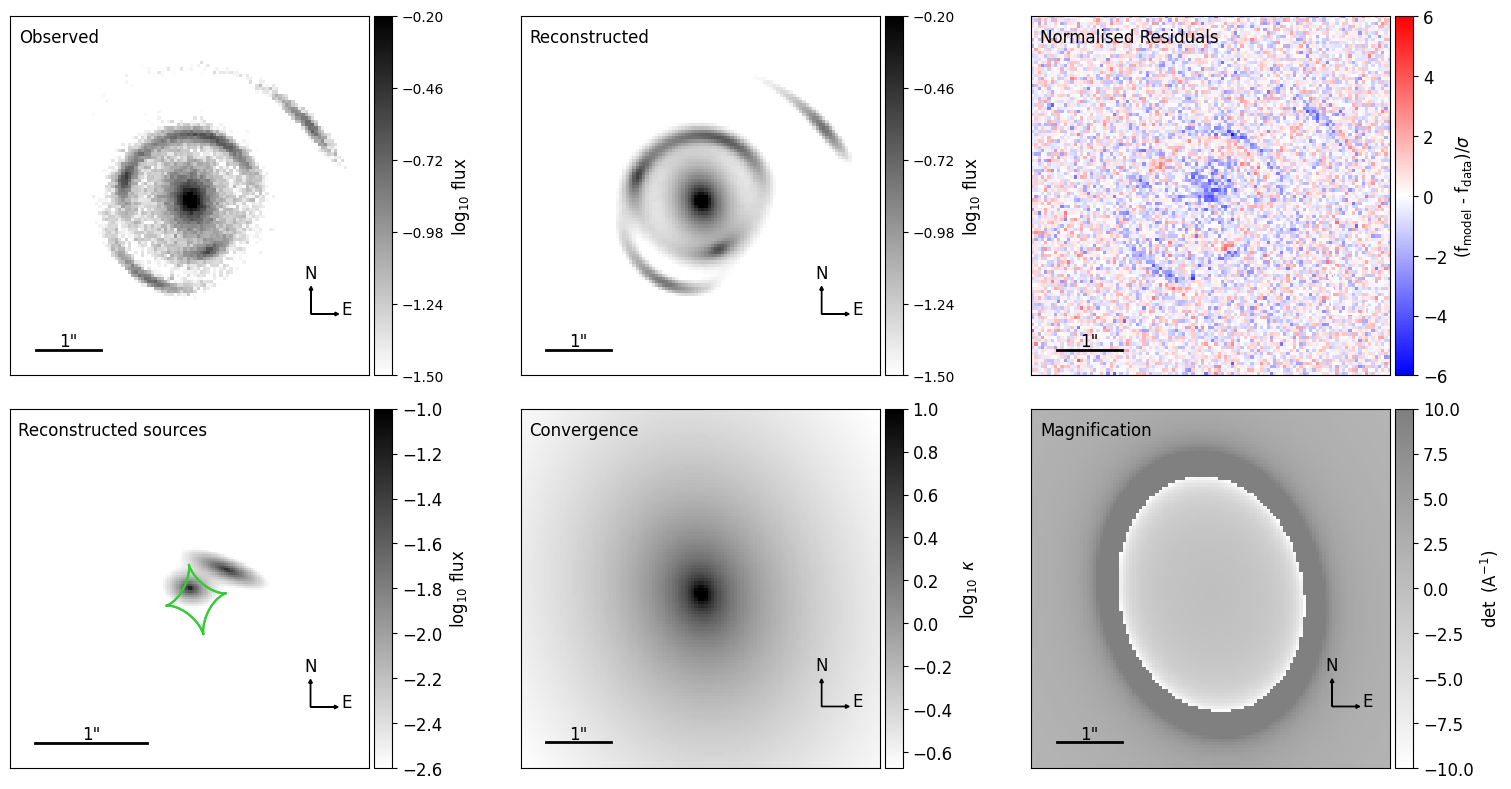

In [20]:
output_plot_model_fit(kwargs_data_F200LP, multi_band_list_out, kwargs_model, kwargs_result)

In [29]:
job_name = 'PSO_double_source_test_mock1'

configure_model_and_run(job_name, sampling_inputs, cluster_compute=True, 
                fitting_kwargs_list=fitting_kwargs_list, kwargs_params=kwargs_params)

Must run job on cluster with jobname PSO_double_source_test_mock1 and job file PSO_double_source_tes.job


In [ ]:
job_name_out = job_name+'_out.txt'  # 'DCLS0353_double_source_F200LP_V18_run_07_out.txt'

output_temp = os.path.join(base_path, 'local_temp', job_name_out)
  
f = open(output_temp, 'rb')
[input_, output_] = joblib.load(f)
f.close()

fitting_kwargs_list, multi_band_list, kwargs_model, kwargs_constraints, kwargs_likelihood, kwargs_params, init_samples = input_

kwargs_result, multi_band_list_out, fit_output, _ = output_



In [ ]:
# # A prior run's best fit parameters with PSO to check against


# {'kwargs_lens': [{'theta_E': 1.7547256141249323,
#    'e1': -0.11614655684344428,
#    'e2': -0.050205824444721894,
#    'center_x': 0.006885412971899223,
#    'center_y': -0.09041513412952838},
#   {'gamma_ext': 4.3810807125896135e-06,
#    'psi_ext': 0.22128400840926274,
#    'ra_0': 0,
#    'dec_0': 0},
#   {'theta_E': 2.5437373185135694e-05,
#    'e1': 0.17277700626519565,
#    'e2': -0.06945759813407523,
#    'center_x': -0.051131214811328866,
#    'center_y': 0.00894405414764441}],
#  'kwargs_source': [{'amp': 5.563166958563405,
#    'R_sersic': 0.2303638270880491,
#    'n_sersic': 2.8556692057627844,
#    'e1': 0.17277700626519565,
#    'e2': -0.06945759813407523,
#    'center_x': -0.051131214811328866,
#    'center_y': 0.00894405414764441},
#   {'amp': 17.99800997387111,
#    'R_sersic': 0.1297600038897629,
#    'n_sersic': 1.2470121318099168,
#    'e1': 0.4069626428035062,
#    'e2': -0.37031526766730594,
#    'center_x': 0.27981682228484966,
#    'center_y': 0.17255083153838277}],
#  'kwargs_lens_light': [{'amp': 1.899751823215279,
#    'R_sersic': 2.472095085352165,
#    'n_sersic': 5.498284391552152,
#    'e1': -0.11926957432058108,
#    'e2': -0.06465813393837616,
#    'center_x': 0.012529230941700146,
#    'center_y': -0.09040810706704128}],
#  'kwargs_ps': [],
#  'kwargs_special': {},
#  'kwargs_extinction': [],
#  'kwargs_tracer_source': []}